# ML Practice: Heart Disease Prediction
## Applying Decision Trees to Medical Data

---

## Goal

Apply the same ML workflow you learned with Titanic to predict heart disease.

**Key Question:** Can we predict heart disease from medical measurements?

**NEW Challenge:** When medical data is missing, what should we do?

---

## Before You Start

### Think About:
1. How is medical data different from Titanic data?
2. Which features might predict heart disease?
3. Is it ethical to use AI for medical decisions?
4. **NEW:** If a patient didn't get a test, should we make up the result?

**Write 2-3 sentences with your thoughts:**


---

## Data Dictionary - READ THIS FIRST!

Understanding medical terminology is critical! Below are the **original column names** and what we'll **rename them to** for easier understanding.

### Patient Info:
| Original Name | Easy Name | Description |
|---------------|-----------|-------------|
| age | age | Patient's age in years |
| sex | sex | Male or Female |
| dataset | hospital | Which hospital collected the data |

### Symptoms:
| Original Name | Easy Name | Description |
|---------------|-----------|-------------|
| cp | chest_pain_type | Type of chest pain (typical angina, atypical angina, non-anginal, asymptomatic) |
| exang | exercise_chest_pain | Does the patient get chest pain during exercise? (True/False) |

### Test Results:
| Original Name | Easy Name | Description |
|---------------|-----------|-------------|
| trestbps | resting_bp | Resting blood pressure in mm Hg (Normal < 120) |
| chol | cholesterol | Cholesterol level in mg/dl (Normal < 200) |
| fbs | high_blood_sugar | Is fasting blood sugar > 120? (True = diabetes risk) |
| restecg | heart_rhythm | Resting heart rhythm test result (normal, stt abnormality, lv hypertrophy) |
| thalch | max_heart_rate | Maximum heart rate achieved during stress test |
| oldpeak | heart_stress | ST depression (measure of heart stress during exercise) |
| slope | stress_test_slope | Slope of peak exercise ST segment (upsloping=normal, flat, downsloping=bad) |
| ca | blocked_vessels | Number of major blood vessels blocked (0-3) - **⚠️ EXPENSIVE TEST** |
| thal | blood_flow | Blood flow test result (normal, fixed defect, reversible defect) - **⚠️ CRITICAL TEST** |

### Target:
| Original Name | Easy Name | Description |
|---------------|-----------|-------------|
| num | has_disease | 0 = no disease, 1-4 = disease severity (we'll convert to 0=healthy, 1=has disease) |

**Full details:** https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

---

## Step 1: Import Libraries

**What we're doing:** Loading all the Python tools we need for machine learning  
**Why:** Just like Titanic, we need pandas for data, sklearn for ML, and matplotlib for visualization

In [4]:
# Import pandas for working with data tables
import pandas as pd

# Import sklearn tools for machine learning
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Create and visualize decision trees
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluate model performance

# Import visualization libraries
import matplotlib.pyplot as plt  # Create charts and graphs
import numpy as np  # Work with arrays and numbers

print("Libraries imported!")

Libraries imported!


---

## Step 2: Load the Data

**What we're doing:** Reading the heart disease dataset from a CSV file  
**Why:** Before we can analyze or predict anything, we need to load our data into memory

In [6]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('heart_disease_uci.csv')

# Show how many rows (patients) and columns (features) we have
print(f"Dataset: {df.shape[0]} patients, {df.shape[1]} columns")

# Display the first few rows to see what the data looks like
print("\nFirst few rows:")
df.head()

Dataset: 920 patients, 16 columns

First few rows:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### **Question 1:** How many patients are in this dataset?

#### **Answer:**


---

## Step 3: Explore the Data

**What we're doing:** Looking at the data structure and checking for problems  
**Why:** Understanding our data helps us make better ML models and catch issues early

In [9]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### **Question 2:** Which columns have missing data? (Look for Non-Null Count < 920)

#### **Answer:**


---

## Step 4: Rename Columns for Clarity

**What we're doing:** Changing medical jargon to plain English  
**Why:** Names like "trestbps" and "thal" don't mean anything to most people!

In [12]:
# Create a dictionary that maps old column names to new, easier-to-understand names
column_rename = {
    'trestbps': 'resting_bp',           # Resting blood pressure
    'chol': 'cholesterol',              # Cholesterol level
    'thalch': 'max_heart_rate',         # Maximum heart rate during stress test
    'oldpeak': 'heart_stress',          # Heart stress measure
    'ca': 'blocked_vessels',            # Number of blocked vessels
    'thal': 'blood_flow',               # Blood flow test result
    'exang': 'exercise_chest_pain',     # Chest pain during exercise
    'cp': 'chest_pain_type',            # Type of chest pain
    'restecg': 'heart_rhythm',          # Heart rhythm test
    'fbs': 'high_blood_sugar',          # High fasting blood sugar
    'dataset': 'hospital',              # Which hospital
    'slope': 'stress_test_slope'        # Slope of stress test
}

# Apply the renaming to our DataFrame
df = df.rename(columns=column_rename)

print("Columns renamed for easier understanding!")

Columns renamed for easier understanding!


---

## Step 5: Investigate Missing Data (CRITICAL DECISION AHEAD!)

**What we're doing:** Analyzing which medical tests are missing for many patients  
**Why:** This is where real-world ML gets messy - we have to make tough choices!

In [14]:
# Count how many missing values are in each column
missing_counts = df.isnull().sum()

# Calculate the percentage of data that's missing
missing_percent = (missing_counts / len(df) * 100).round(1)

# Create a summary table showing missing data
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Percent Missing': missing_percent
})

# Only show columns that have missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

# Sort by percentage missing (worst first)
missing_summary = missing_summary.sort_values('Percent Missing', ascending=False)

print("=" * 70)
print("MISSING DATA ANALYSIS")
print("=" * 70)
print(f"Total patients: {len(df)}\n")
print(missing_summary)

# Highlight the major problems
print("\n CRITICAL ISSUES:")
print(f"   - 'blocked_vessels': {missing_percent['blocked_vessels']:.1f}% missing")
print(f"     (This is an angiogram - expensive, invasive test)")
print(f"   - 'blood_flow': {missing_percent['blood_flow']:.1f}% missing")
print(f"     (This is a thalassemia test - critical diagnostic tool)")
print(f"   - 'stress_test_slope': {missing_percent['stress_test_slope']:.1f}% missing")
print(f"     (Detailed stress test measurement)")

MISSING DATA ANALYSIS
Total patients: 920

                     Missing Count  Percent Missing
blocked_vessels                611             66.4
blood_flow                     486             52.8
stress_test_slope              309             33.6
high_blood_sugar                90              9.8
heart_stress                    62              6.7
resting_bp                      59              6.4
max_heart_rate                  55              6.0
exercise_chest_pain             55              6.0
cholesterol                     30              3.3
heart_rhythm                     2              0.2

 CRITICAL ISSUES:
   - 'blocked_vessels': 66.4% missing
     (This is an angiogram - expensive, invasive test)
   - 'blood_flow': 52.8% missing
     (This is a thalassemia test - critical diagnostic tool)
   - 'stress_test_slope': 33.6% missing
     (Detailed stress test measurement)


### **Question 3:** Why do you think 'blocked_vessels' and 'blood_flow' have so much missing data?

**Hint:** Think about when doctors order these tests (cost, invasiveness, already suspecting disease?).  Perhaps you could search for why this might be the case... ask AI or Google it.   

#### **Answer:**


---

## Step 6: THE BIG DECISION - How Do We Handle Missing Data?

**What we're doing:** Choosing between data quality vs. data quantity  
**Why:** This choice will affect everything - our accuracy, our ethics, our conclusions

### Two Paths Forward:

#### **Path A: "Clean Data" Approach**
- ✓ Drop rows missing `blocked_vessels` OR `blood_flow`
- ✓ Use ONLY real medical test results
- ✓ No fabricated data
- ✗ Lose ~67% of patients (920 → 299)
- ✗ Smaller training set

#### **Path B: "Maximum Data" Approach**  
- ✓ Fill missing values (median for numbers, mode for categories)
- ✓ Keep all 920 patients
- ✓ Larger training set
- ✗ Introduces synthetic medical test results
- ✗ Could mislead the model

**We'll run BOTH and compare!**

In [17]:
# First, let's see how many patients we'd have with each approach

# Path A: Drop rows with missing blocked_vessels OR blood_flow
df_clean = df.dropna(subset=['blocked_vessels', 'blood_flow'])

print("=" * 70)
print("PATH COMPARISON")
print("=" * 70)
print(f"\nPath A (Clean Data): {len(df_clean)} patients ({len(df_clean)/len(df)*100:.1f}%)")
print(f"Path B (Maximum Data): {len(df)} patients (100%)")
print(f"\nDifference: Path B has {len(df) - len(df_clean)} MORE patients")

PATH COMPARISON

Path A (Clean Data): 299 patients (32.5%)
Path B (Maximum Data): 920 patients (100%)

Difference: Path B has 621 MORE patients


### **Question 4:** Which approach do YOU think is better for medical ML? Why?

#### **Answer:**


---

## Step 7A: Prepare Path A Data (Clean Data)

**What we're doing:** Cleaning up the smaller dataset with only real test results  
**Why:** Let's see if quality beats quantity!

In [20]:
# Start with the clean dataset (already dropped blocked_vessels and blood_flow missing rows)
df_pathA = df_clean.copy()

# For remaining columns with minor missing data, fill with median/mode
# (These have < 20% missing, so filling is more reasonable)
numeric_cols = df_pathA.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_pathA.select_dtypes(include=['object', 'bool']).columns

# Fill numeric columns with median
for col in numeric_cols:
    if df_pathA[col].isnull().sum() > 0:
        df_pathA[col] = df_pathA[col].fillna(df_pathA[col].median())

# Fill categorical columns with mode (most common value)
for col in categorical_cols:
    if df_pathA[col].isnull().sum() > 0:
        df_pathA[col] = df_pathA[col].fillna(df_pathA[col].mode()[0])

# Create target variable: 0 = healthy, 1 = has disease
df_pathA['has_disease'] = df_pathA['num'].apply(lambda x: 1 if x > 0 else 0)

print("✓ Path A cleaned!")
print(f"  Final size: {len(df_pathA)} patients")
print(f"  Missing values: {df_pathA.isnull().sum().sum()}")

✓ Path A cleaned!
  Final size: 299 patients
  Missing values: 0


---

## Step 7B: Prepare Path B Data (Maximum Data)

**What we're doing:** Filling ALL missing values to keep all 920 patients  
**Why:** Let's see if more data compensates for lower quality!

In [22]:
# Start with the full dataset
df_pathB = df.copy()

# Fill ALL missing values (including blocked_vessels and blood_flow)
numeric_cols = df_pathB.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_pathB.select_dtypes(include=['object', 'bool']).columns

# Fill numeric columns with median
for col in numeric_cols:
    if df_pathB[col].isnull().sum() > 0:
        df_pathB[col] = df_pathB[col].fillna(df_pathB[col].median())

# Fill categorical columns with mode
for col in categorical_cols:
    if df_pathB[col].isnull().sum() > 0:
        df_pathB[col] = df_pathB[col].fillna(df_pathB[col].mode()[0])

# ---------------------------
# CREATE TARGET VARIABLE WITH A DEF FUNCTION
# ---------------------------

# Define a normal function that converts num → has_disease
def classify_disease(x):
    """
    Returns 1 if the patient has disease (x > 0)
    Returns 0 if the patient is healthy (x == 0)
    """
    if x > 0:
        return 1
    else:
        return 0

# Apply the function to each value in the 'num' column
df_pathB['has_disease'] = df_pathB['num'].apply(classify_disease)


# Status messages showing results
print("✓ Path B cleaned!")
print(f"  Final size: {len(df_pathB)} patients")
print(f"  Missing values: {df_pathB.isnull().sum().sum()}")


✓ Path B cleaned!
  Final size: 920 patients
  Missing values: 0


---

## Step 8: Prepare Features for BOTH Paths

**What we're doing:** Encoding categorical variables and splitting data for both approaches  
**Why:** We need to prepare both datasets identically so we can compare fairly

In [24]:
# Function to prepare a dataset for modeling
def prepare_dataset(df_input, path_name):
    """
    Prepare a dataset by:
    1. Dropping unnecessary columns
    2. Separating features (X) from target (y)
    3. One-hot encoding categorical variables
    4. Splitting into train/test sets
    """
    print(f"\n{'='*70}")
    print(f"Preparing {path_name}")
    print(f"{'='*70}")
    
    # Drop unnecessary columns
    df_work = df_input.drop(['id', 'num'], axis=1)
    
    # Separate features from target
    X = df_work.drop('has_disease', axis=1)
    y = df_work['has_disease']
    
    print(f"Initial features: {X.shape[1]}")
    print(f"Target distribution:")
    print(f"  Healthy: {(y == 0).sum()} ({(y == 0).sum()/len(y)*100:.1f}%)")
    print(f"  Disease: {(y == 1).sum()} ({(y == 1).sum()/len(y)*100:.1f}%)")
    
    # One-hot encode categorical variables
    categorical_cols = X.select_dtypes(include=['object']).columns
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    
    print(f"After encoding: {X.shape[1]} features")
    
    # Split into train/test (80/20)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    
    print(f"Training set: {len(X_train)} patients")
    print(f"Testing set: {len(X_test)} patients")
    
    return X_train, X_test, y_train, y_test, X.columns

# Prepare both paths
X_train_A, X_test_A, y_train_A, y_test_A, feature_names_A = prepare_dataset(df_pathA, "PATH A (Clean Data)")
X_train_B, X_test_B, y_train_B, y_test_B, feature_names_B = prepare_dataset(df_pathB, "PATH B (Maximum Data)")


Preparing PATH A (Clean Data)
Initial features: 14
Target distribution:
  Healthy: 160 (53.5%)
  Disease: 139 (46.5%)
After encoding: 20 features
Training set: 239 patients
Testing set: 60 patients

Preparing PATH B (Maximum Data)
Initial features: 14
Target distribution:
  Healthy: 411 (44.7%)
  Disease: 509 (55.3%)
After encoding: 21 features
Training set: 736 patients
Testing set: 184 patients


### **Question 5:** Which path has more training samples? Does more always mean better?

#### **Answer:**


---

## Step 9: Train Models for BOTH Paths

**What we're doing:** Creating and training decision trees on both datasets  
**Why:** Time to see which approach actually works better!

In [27]:
# Train Path A model (Clean Data)
model_A = DecisionTreeClassifier(max_depth=5, random_state=42)
model_A.fit(X_train_A, y_train_A)

# Train Path B model (Maximum Data)
model_B = DecisionTreeClassifier(max_depth=5, random_state=42)
model_B.fit(X_train_B, y_train_B)

print("✓ Both models trained!")
print("  Path A: Trained on", len(X_train_A), "patients (real data only)")
print("  Path B: Trained on", len(X_train_B), "patients (includes filled data)")

✓ Both models trained!
  Path A: Trained on 239 patients (real data only)
  Path B: Trained on 736 patients (includes filled data)


---

## Step 10: Evaluate and Compare BOTH Models

**What we're doing:** Testing both models and comparing their performance  
**Why:** THIS IS THE MOMENT OF TRUTH - which approach was better?

In [29]:
# Make predictions for both models
y_pred_A = model_A.predict(X_test_A)
y_pred_B = model_B.predict(X_test_B)

# Calculate accuracy for both
accuracy_A = accuracy_score(y_test_A, y_pred_A)
accuracy_B = accuracy_score(y_test_B, y_pred_B)

print("=" * 70)
print("THE RESULTS ARE IN!")
print("=" * 70)
print(f"\nPath A (Clean Data - 299 patients):")
print(f"  Accuracy: {accuracy_A:.1%}")
print(f"\nPath B (Maximum Data - 920 patients):")
print(f"  Accuracy: {accuracy_B:.1%}")
print(f"\nDifference: {abs(accuracy_A - accuracy_B):.1%}")

if accuracy_A > accuracy_B:
    print(f"\nPath A (Clean Data) wins by {(accuracy_A - accuracy_B)*100:.1f} percentage points!")
elif accuracy_B > accuracy_A:
    print(f"\nPath B (Maximum Data) wins by {(accuracy_B - accuracy_A)*100:.1f} percentage points!")
else:
    print(f"\n🤝 It's a tie!")

print("\n" + "=" * 70)

THE RESULTS ARE IN!

Path A (Clean Data - 299 patients):
  Accuracy: 76.7%

Path B (Maximum Data - 920 patients):
  Accuracy: 78.3%

Difference: 1.6%

Path B (Maximum Data) wins by 1.6 percentage points!



---

## Step 11: Detailed Comparison - Classification Reports

**What we're doing:** Looking deeper at precision, recall, and F1-scores  
**Why:** Accuracy isn't everything - we need to see where each model makes mistakes

In [31]:
print("=" * 70)
print("PATH A (Clean Data) - Classification Report")
print("=" * 70)
print(classification_report(y_test_A, y_pred_A, target_names=['No Disease', 'Has Disease']))

print("\n" + "=" * 70)
print("PATH B (Maximum Data) - Classification Report")
print("=" * 70)
print(classification_report(y_test_B, y_pred_B, target_names=['No Disease', 'Has Disease']))

PATH A (Clean Data) - Classification Report
              precision    recall  f1-score   support

  No Disease       0.74      0.88      0.80        32
 Has Disease       0.82      0.64      0.72        28

    accuracy                           0.77        60
   macro avg       0.78      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60


PATH B (Maximum Data) - Classification Report
              precision    recall  f1-score   support

  No Disease       0.76      0.76      0.76        82
 Has Disease       0.80      0.80      0.80       102

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184



### **Question 6:** For medical diagnosis, is recall (catching sick patients) or precision (avoiding false alarms) more important? Why?

#### **Answer:**


---

## Step 12: Confusion Matrices - Side by Side

**What we're doing:** Visualizing exactly where each model makes mistakes  
**Why:** False negatives (missing sick patients) are DANGEROUS in medical ML

In [34]:
# Create confusion matrices
cm_A = confusion_matrix(y_test_A, y_pred_A)
cm_B = confusion_matrix(y_test_B, y_pred_B)

print("=" * 70)
print("PATH A (Clean Data) - Confusion Matrix")
print("=" * 70)
cm_df_A = pd.DataFrame(
    cm_A,
    index=['Actually Healthy', 'Actually Sick'],
    columns=['Predicted Healthy', 'Predicted Sick']
)
print(cm_df_A)
print(f"\n✓ Correct predictions: {cm_A[0,0] + cm_A[1,1]}")
print(f"✗ False Negatives (Missed sick patients): {cm_A[1,0]} ← DANGEROUS!")
print(f"✗ False Positives (False alarms): {cm_A[0,1]}")

print("\n" + "=" * 70)
print("PATH B (Maximum Data) - Confusion Matrix")
print("=" * 70)
cm_df_B = pd.DataFrame(
    cm_B,
    index=['Actually Healthy', 'Actually Sick'],
    columns=['Predicted Healthy', 'Predicted Sick']
)
print(cm_df_B)
print(f"\n✓ Correct predictions: {cm_B[0,0] + cm_B[1,1]}")
print(f"✗ False Negatives (Missed sick patients): {cm_B[1,0]} ← DANGEROUS!")
print(f"✗ False Positives (False alarms): {cm_B[0,1]}")

PATH A (Clean Data) - Confusion Matrix
                  Predicted Healthy  Predicted Sick
Actually Healthy                 28               4
Actually Sick                    10              18

✓ Correct predictions: 46
✗ False Negatives (Missed sick patients): 10 ← DANGEROUS!
✗ False Positives (False alarms): 4

PATH B (Maximum Data) - Confusion Matrix
                  Predicted Healthy  Predicted Sick
Actually Healthy                 62              20
Actually Sick                    20              82

✓ Correct predictions: 144
✗ False Negatives (Missed sick patients): 20 ← DANGEROUS!
✗ False Positives (False alarms): 20


### ⚠️ WAIT - Those Numbers Are Misleading!

**Critical Problem:** Comparing raw counts across different sample sizes is UNFAIR!

- Path A tested only **60 patients**
- Path B tested **184 patients** (3x more!)

**We need to compare RATES, not raw numbers!**

In [36]:
# Calculate error RATES for fair comparison
# These show what PERCENTAGE of patients were misclassified

print("=" * 70)
print("📊 RATE-BASED COMPARISON (The Fair Way to Compare)")
print("=" * 70)

# Path A rates
# False Negative Rate = What % of sick patients did we miss?
fn_rate_A = (cm_A[1,0] / (cm_A[1,0] + cm_A[1,1])) * 100
# False Positive Rate = What % of healthy patients got false alarms?
fp_rate_A = (cm_A[0,1] / (cm_A[0,0] + cm_A[0,1])) * 100

# Path B rates  
fn_rate_B = (cm_B[1,0] / (cm_B[1,0] + cm_B[1,1])) * 100
fp_rate_B = (cm_B[0,1] / (cm_B[0,0] + cm_B[0,1])) * 100

print(f"\n🏥 Path A (Clean Data - 299 patients):")
print(f"   Test Set Size: {len(y_test_A)} patients")
print(f"   False Negative Rate: {fn_rate_A:.1f}%")
print(f"      (Missed {cm_A[1,0]} out of {cm_A[1,0] + cm_A[1,1]} sick patients)")
print(f"   False Positive Rate: {fp_rate_A:.1f}%")
print(f"      (False alarm for {cm_A[0,1]} out of {cm_A[0,0] + cm_A[0,1]} healthy patients)")

print(f"\n🏥 Path B (Maximum Data - 920 patients):")
print(f"   Test Set Size: {len(y_test_B)} patients")
print(f"   False Negative Rate: {fn_rate_B:.1f}%")
print(f"      (Missed {cm_B[1,0]} out of {cm_B[1,0] + cm_B[1,1]} sick patients)")
print(f"   False Positive Rate: {fp_rate_B:.1f}%")
print(f"      (False alarm for {cm_B[0,1]} out of {cm_B[0,0] + cm_B[0,1]} healthy patients)")

print("\n" + "=" * 70)
print("🎯 KEY INSIGHTS:")
print("=" * 70)

if fn_rate_B < fn_rate_A:
    print(f"✓ Path B catches {fn_rate_A - fn_rate_B:.1f}% MORE sick patients (proportionally)")
else:
    print(f"✓ Path A catches {fn_rate_B - fn_rate_A:.1f}% MORE sick patients (proportionally)")

if fp_rate_B > fp_rate_A:
    print(f"✗ Path B causes {fp_rate_B - fp_rate_A:.1f}% MORE false alarms (proportionally)")
else:
    print(f"✗ Path A causes {fp_rate_A - fp_rate_B:.1f}% MORE false alarms (proportionally)")

print("\n💡 What if Path A had 102 sick patients like Path B?")
print(f"   At {fn_rate_A:.1f}% miss rate, it would miss ~{int(102 * fn_rate_A/100)} patients!")
print(f"   Path B's 20 missed patients doesn't look so bad now, does it?")

📊 RATE-BASED COMPARISON (The Fair Way to Compare)

🏥 Path A (Clean Data - 299 patients):
   Test Set Size: 60 patients
   False Negative Rate: 35.7%
      (Missed 10 out of 28 sick patients)
   False Positive Rate: 12.5%
      (False alarm for 4 out of 32 healthy patients)

🏥 Path B (Maximum Data - 920 patients):
   Test Set Size: 184 patients
   False Negative Rate: 19.6%
      (Missed 20 out of 102 sick patients)
   False Positive Rate: 24.4%
      (False alarm for 20 out of 82 healthy patients)

🎯 KEY INSIGHTS:
✓ Path B catches 16.1% MORE sick patients (proportionally)
✗ Path B causes 11.9% MORE false alarms (proportionally)

💡 What if Path A had 102 sick patients like Path B?
   At 35.7% miss rate, it would miss ~36 patients!
   Path B's 20 missed patients doesn't look so bad now, does it?


---

## 🚨 CRITICAL PROBLEM: Can We Even Trust Path B's Results?

**What we're doing:** Examining whether Path B's "better" performance is real or an illusion  
**Why:** This is the most important insight in the entire assignment!

### The Synthetic Data Problem

Remember: Path B filled in missing values for `blocked_vessels` and `blood_flow` - two of the MOST important diagnostic tests.

**Let's calculate how much of our data is synthetic:**

In [39]:
# Calculate what percentage of Path B's test data is synthetic
# We dropped rows in Path A, so those rows in Path B have synthetic data

print("=" * 70)
print("🔍 SYNTHETIC DATA ANALYSIS - Path B")
print("=" * 70)

# Calculate how many patients we dropped in Path A
patients_dropped = len(df) - len(df_pathA)
pct_dropped = (patients_dropped / len(df)) * 100

print(f"\nOriginal dataset: {len(df)} patients")
print(f"Path A (dropped missing): {len(df_pathA)} patients")
print(f"Patients with synthetic data: {patients_dropped} ({pct_dropped:.1f}%)")

print(f"\n⚠️ This means roughly {pct_dropped:.0f}% of Path B's data contains FABRICATED medical tests!")

# Estimate test set contamination
test_contamination = len(y_test_B) * (pct_dropped / 100)
print(f"\nPath B Test Set: {len(y_test_B)} patients")
print(f"Estimated synthetic: ~{int(test_contamination)} patients ({pct_dropped:.0f}%)")
print(f"Estimated real: ~{int(len(y_test_B) - test_contamination)} patients ({100-pct_dropped:.0f}%)")

🔍 SYNTHETIC DATA ANALYSIS - Path B

Original dataset: 920 patients
Path A (dropped missing): 299 patients
Patients with synthetic data: 621 (67.5%)

⚠️ This means roughly 68% of Path B's data contains FABRICATED medical tests!

Path B Test Set: 184 patients
Estimated synthetic: ~124 patients (68%)
Estimated real: ~59 patients (32%)


### Why This Destroys Path B's Credibility

**Path B's model:**
1. ❌ Trained on ~67% synthetic data
2. ❌ Tested on ~67% synthetic data
3. ❌ Reports 78% accuracy

**But we DON'T know:**
- How accurate is it on the ~33% of REAL data?
- Is it just good at predicting the median/mode values we filled in?
- What's the actual accuracy on real patients?

**Path B might be:**
- 95% accurate on synthetic data (easy - it learned from it!)
- 50% accurate on real data (actual medical performance)
- Average: 78% (meaningless metric!)

### The Circular Reasoning Trap

```
Step 1: We don't have blood_flow test → Fill with "normal" (most common)
Step 2: Model learns "normal blood flow = healthy" pattern
Step 3: Test patient has missing blood_flow → We fill with "normal"
Step 4: Model predicts "healthy" → We say "Correct!"
```

**But did the model actually learn anything about heart disease?** Or did it just learn to predict our own fabricated data?

### Path A vs Path B - The REAL Comparison

| Metric | Path A | Path B |
|--------|--------|--------|
| Accuracy | **77% on REAL data** | 78% on mixed data |
| Trustworthiness | ✅ Can trust this number | ❌ Cannot trust this number |
| Real-world use | ✅ Would work on new patients | ❓ Unknown performance on real patients |
| What we're measuring | Actual ML performance | Consistency with our own fabrications |

### **Question 7:** Now that you understand the synthetic data problem, can we even trust Path B's "better" performance?

#### **Answer:**


### **Question 8:** If you were a hospital administrator, which model would you actually deploy? Why?

**Think about:**
- Can you trust the accuracy numbers that come from testing on fake data?
- Which is better: 77% accuracy on real patients OR 78% accuracy on a mix of real and fabricated data?
- When a new patient comes in without these expensive tests, will Path B work? Or will you have to make up test results for them too?  Kind of a dilemma, isn't it? 

#### **Answer:**


---

## Step 13: Feature Importance Comparison

**What we're doing:** Seeing which medical tests mattered most in each model  
**Why:** Do both models learn similar patterns, or do they disagree?

In [44]:
# Get feature importance for Path A
fi_A = pd.DataFrame({
    'Feature': feature_names_A,
    'Importance': model_A.feature_importances_
}).sort_values('Importance', ascending=False)

# Get feature importance for Path B
fi_B = pd.DataFrame({
    'Feature': feature_names_B,
    'Importance': model_B.feature_importances_
}).sort_values('Importance', ascending=False)

print("=" * 70)
print("PATH A (Clean Data) - Top 5 Most Important Features")
print("=" * 70)
print(fi_A.head(5).to_string(index=False))

print("\n" + "=" * 70)
print("PATH B (Maximum Data) - Top 5 Most Important Features")
print("=" * 70)
print(fi_B.head(5).to_string(index=False))

PATH A (Clean Data) - Top 5 Most Important Features
                    Feature  Importance
          blood_flow_normal    0.350956
            blocked_vessels    0.157385
                cholesterol    0.081692
chest_pain_type_non-anginal    0.074807
               heart_stress    0.073396

PATH B (Maximum Data) - Top 5 Most Important Features
                        Feature  Importance
            exercise_chest_pain    0.361053
                    cholesterol    0.214680
                            age    0.101383
                       sex_Male    0.066417
chest_pain_type_atypical angina    0.061629


### **Question 9:** Do both models agree on the most important features? What does that tell you?

**Hint:** Look at Path A's top feature (blood_flow_normal). Path B had to FILL IN this data for most patients!

#### **Answer:**


---

## Step 14: Visualize Decision Trees

**What we're doing:** Drawing the decision-making process for both models  
**Why:** See if they make decisions differently based on their training data

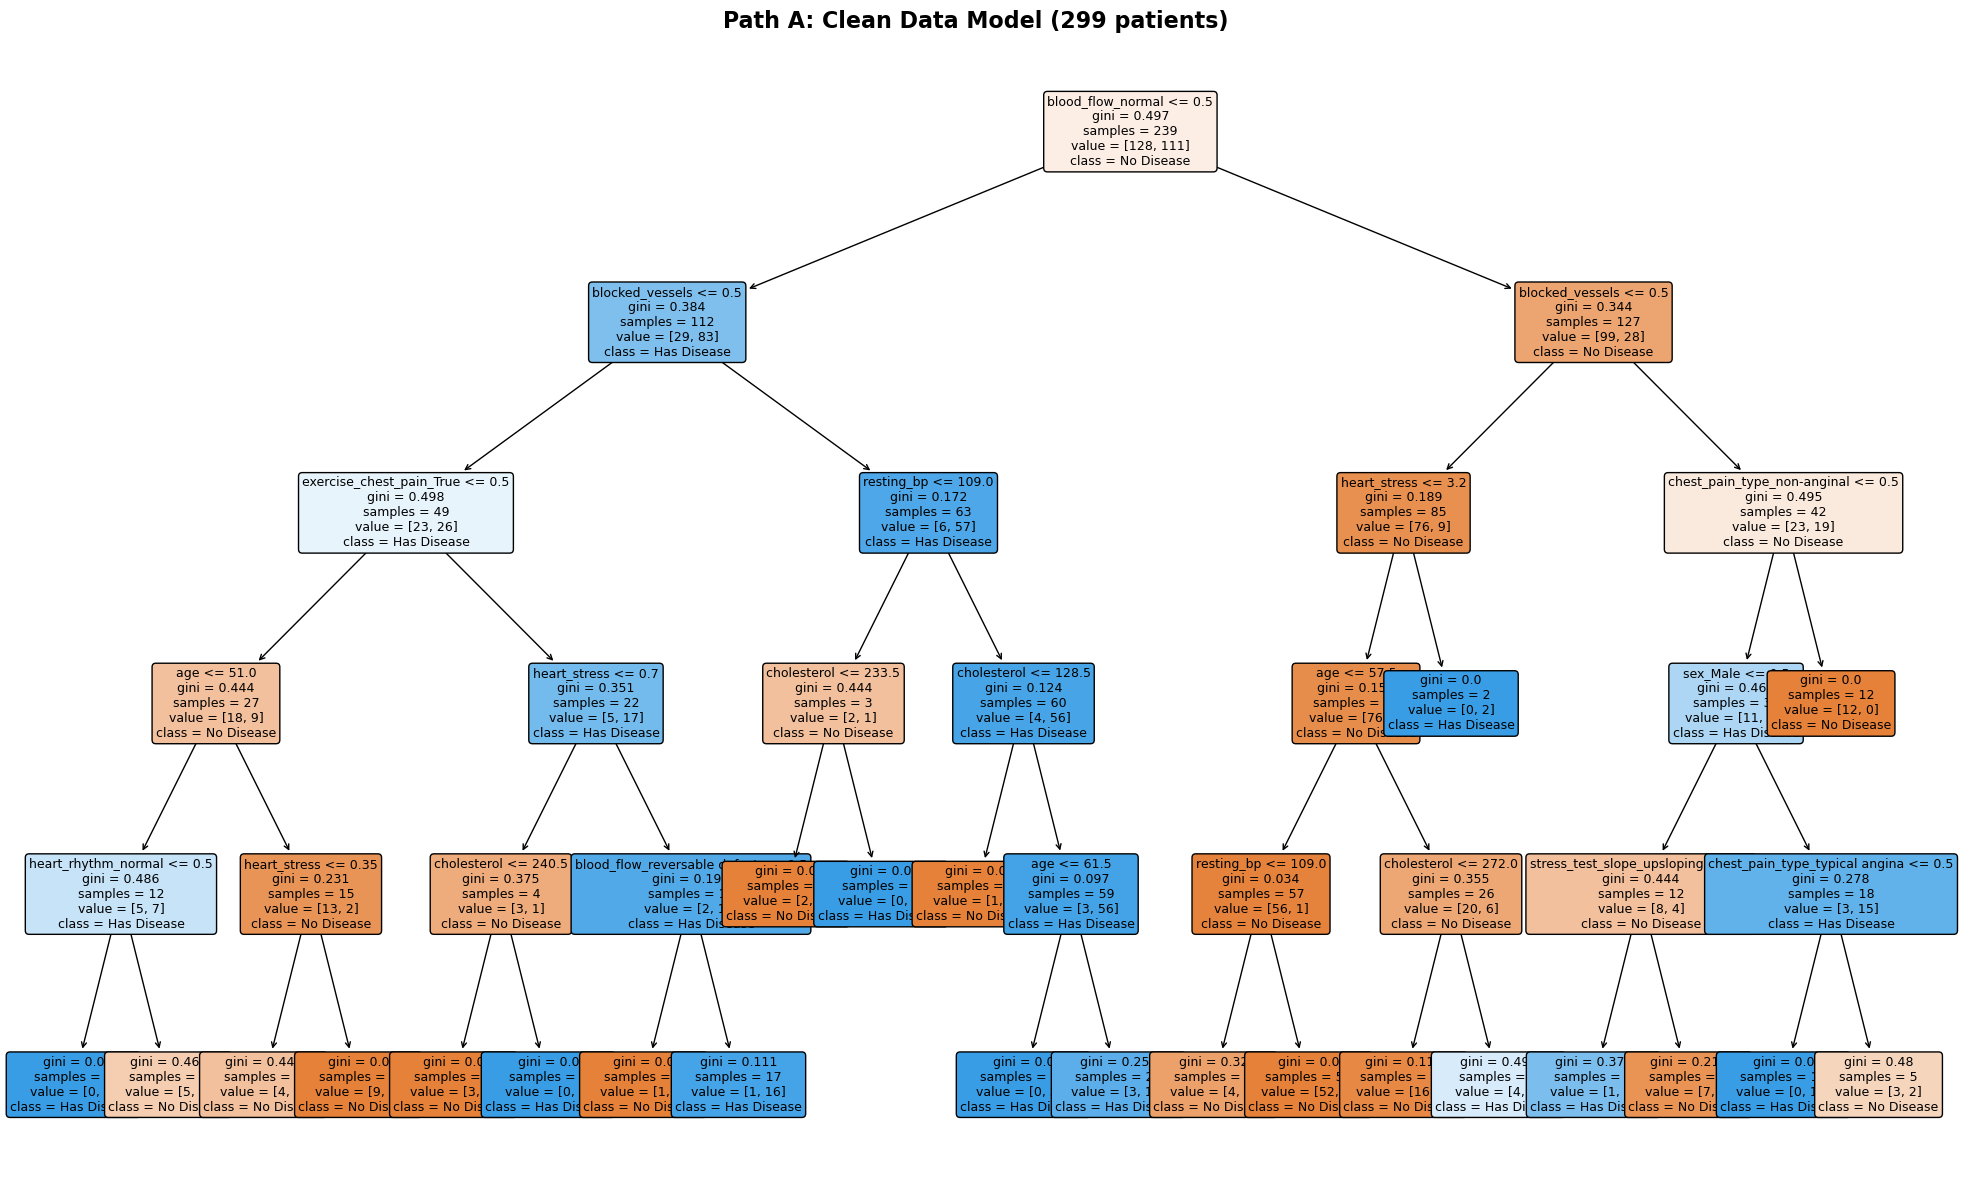

In [47]:
# Visualize Path A tree
plt.figure(figsize=(20, 12))
plot_tree(
    model_A,
    feature_names=list(feature_names_A),
    class_names=['No Disease', 'Has Disease'],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title('Path A: Clean Data Model (299 patients)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

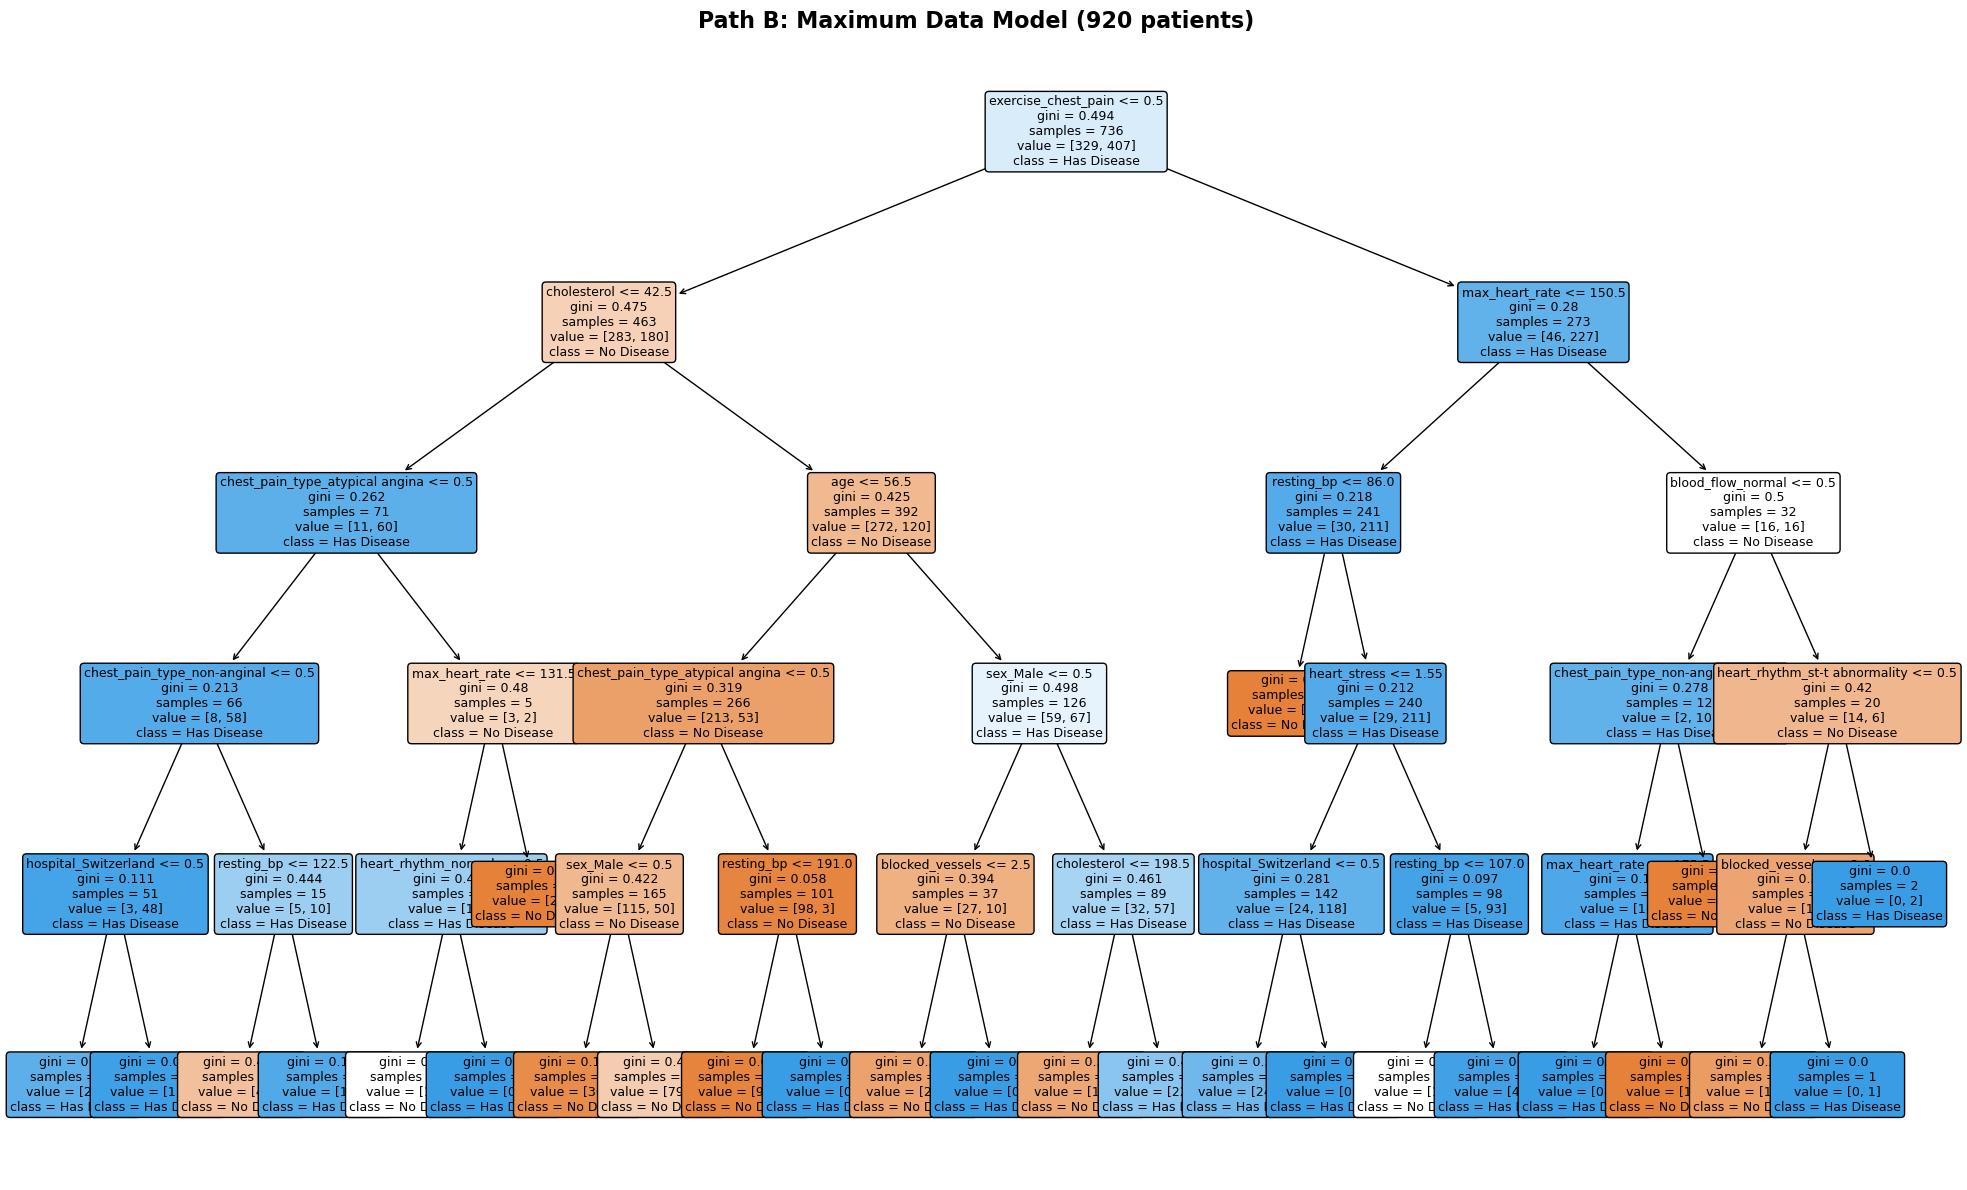

In [48]:
# Visualize Path B tree
plt.figure(figsize=(20, 12))
plot_tree(
    model_B,
    feature_names=list(feature_names_B),
    class_names=['No Disease', 'Has Disease'],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title('Path B: Maximum Data Model (920 patients)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### **Question 10:** Look at the root node of each tree. Do they ask the same first question?

#### **Answer:**


---

## THE BIG PICTURE: Which Path Won?

Fill in this comparison table based on your results:

| Metric | Path A (Clean) | Path B (Maximum) | Can We Trust It? |
|--------|----------------|------------------|------------------|
| **Training Size** | 299 patients | 920 patients | N/A |
| **Test Set Size** | 60 patients | 184 patients | N/A |
| **Accuracy** | ___% on REAL data | ___% on mixed data | ✅ Path A only |
| **Recall (Disease)** | ___% | ___% | ✅ Path A only |
| **False Negative Rate** | ___% | ___% | ✅ Path A only |
| **False Positive Rate** | ___% | ___% | ✅ Path A only |
| **Data Quality** | 100% real tests | ~33% real, ~67% synthetic | Path A wins |
| **Metric Reliability** | ✅ Trustworthy | ❌ Questionable | Path A wins |
| **Ethical Concerns** | Low | High | Path A wins |
| **Real-World Usability** | ✅ Will work on new patients | ❓ Unknown | Path A wins |

### Key Insight:

**Even if Path B shows "better" numbers, we CANNOT trust them** because:
1. It was tested on ~67% synthetic data
2. It learned from ~67% synthetic data  
3. It might just be good at predicting our own fabrications
4. We don't know its TRUE performance on real patients

**Path A's 77% accuracy is on 100% REAL data** - we can trust this number represents actual medical performance.

---

## Critical Thinking Questions

### **Question 11:** Based on ALL the evidence (accuracy, rates, synthetic data problem), which approach would YOU use in a real hospital? Defend your choice.

**Think about:**
- Accuracy vs. ethics vs. reliability
- False negatives (missed diagnoses) 
- Can you trust the metrics?
- Real-world consequences

#### **Answer:**


### **Question 12:** If Path B (more data) performed BETTER with trustworthy metrics, would that make it okay to use fabricated test results?

#### **Answer:**


### **Question 13:** What if we COULDN'T drop patients (imagine we only had 100 total)? What would you do?

#### **Answer:**


---

## Real-World Lessons

### What This Exercise Teaches:

✅ **There's no perfect answer** - Both approaches have tradeoffs

✅ **More data ≠ better** - Quality matters, especially in medicine

✅ **Context matters** - The "right" choice depends on:
   - How much data you have
   - What you're predicting
   - The consequences of being wrong
   - Ethical considerations

✅ **Transparency is critical** - Always document your choices

### How Doctors Actually Use ML:

✅ **Risk Screening Tool** - Flag high-risk patients for follow-up

✅ **Research & Pattern Finding** - Discover correlations in large datasets

✅ **Decision Support** - Help doctors, not replace them

❌ **NOT for Solo Diagnosis** - AI can't see the whole patient

### Ethical Guardrails:

⚠️ Always validate with real doctors

⚠️ Be transparent about data quality

⚠️ Consider bias (Is training data representative?)

⚠️ False negatives are more dangerous than false positives

---

## Final Reflection

**1. What surprised you most about comparing the two approaches?**



**2. Would you trust EITHER of these models with your own health? Why or why not?**



**3. What's the most important lesson you learned about real-world ML?**



**4. If you were advising a hospital on using AI for heart disease screening, what would you tell them?**



---

## Submission Checklist

Before you submit:
- [ ] All code cells run without errors
- [ ] All 13 questions answered with thought and evidence
- [ ] Comparison table filled in
- [ ] Final reflection complete  
- [ ] You can defend your answer to Question 11 (which model to deploy)
- [ ] You understand the synthetic data reliability problem
- [ ] File saved as `ml_practice_heart_disease_comparison.ipynb`

**Upload to GitHub!**

---

** Congratulations! You just wrestled with one of the hardest problems in medical AI!**

**This is what real data scientists do every day.** There are no perfect answers, only informed decisions with clear tradeoffs. You've learned something most ML tutorials skip entirely:

1. **Data quality matters more than quantity** (sometimes)
2. **Metrics can lie** when testing on synthetic data
3. **Ethics and reliability go hand-in-hand** in medical ML
4. **Comparing different sample sizes requires rates, not counts**
5. **The preparation choices often matter more than the algorithm itself**

You now think like a data scientist, not just a coder. 